<a href="https://colab.research.google.com/github/23151009-lab/assignment-lecture-4/blob/main/assignment_lecture_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import measure, color, morphology

In [ ]:
uploaded = files.upload()

Saving rice.png to rice.png


**READ IMAGE (img)**

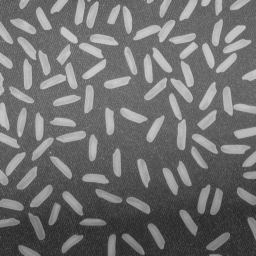

In [ ]:
#Read image (Always run this first to tag the 'img' variable)
img = cv.imread('rice.png') #BGR

#Show image
cv2_imshow(img)

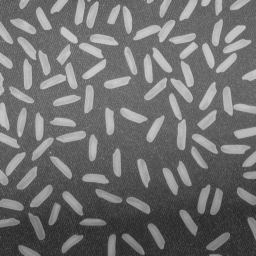

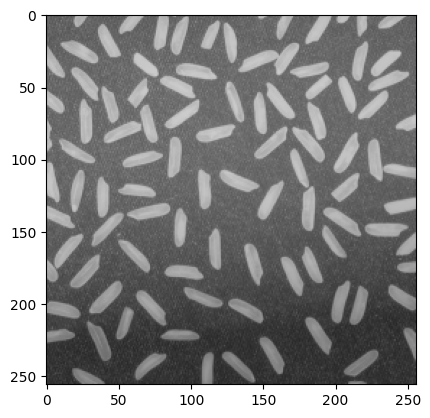

In [ ]:
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)
cv2_imshow(img)

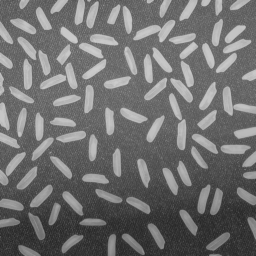

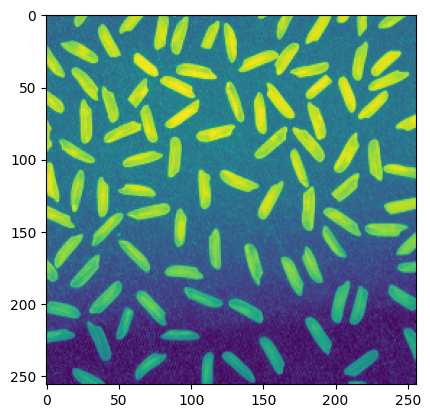

In [ ]:
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.imshow(img_gray)
cv2_imshow(img_gray)

## Otsu’s Binarization


In [ ]:
th, im_gray_th_otsu = cv.threshold(img_gray, 0, 255, cv.THRESH_OTSU)
print(th)

131.0


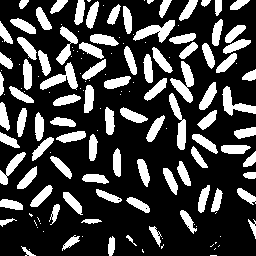

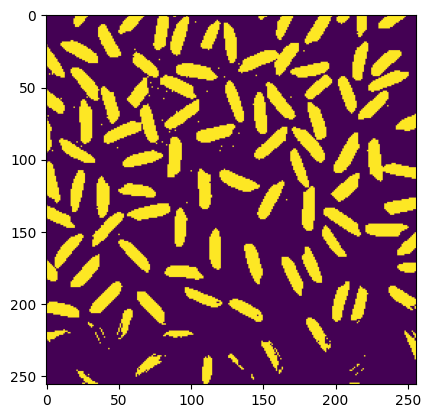

In [ ]:
ret, bw_img = cv.threshold(img_gray,th,255,cv.THRESH_BINARY)
plt.imshow(bw_img)
cv2_imshow(bw_img)

so sánh OTSU


In [ ]:
## Function to plot multiple images
def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (15, 15))
  for i, p in enumerate(images):
    axs[i].imshow(p, 'gray')
    axs[i].set_title(titles[i])
    #axs[i].axis('off')
  plt.show()

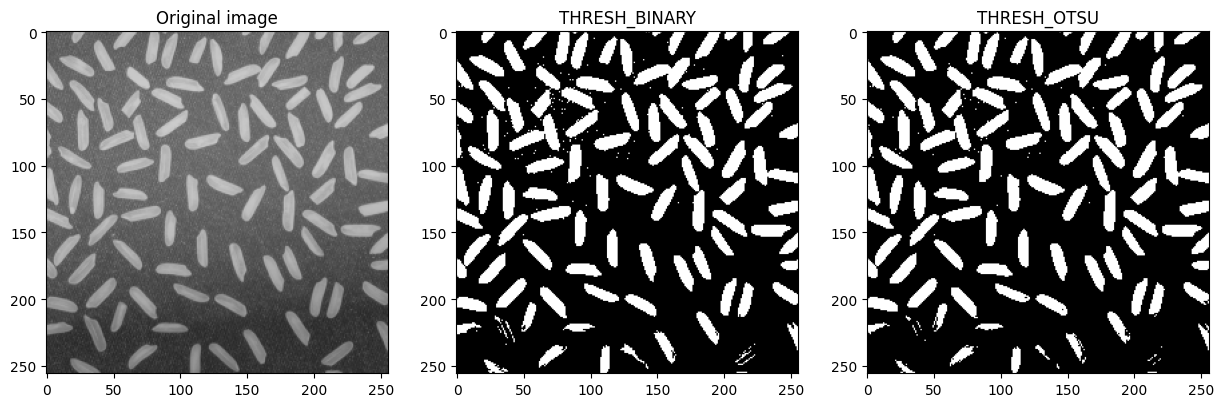

In [ ]:
# global thresholding
ret,img_binary = cv.threshold(img_gray,127,255,cv.THRESH_BINARY)

# Otsu's thresholding
ret,img_otsu_binary = cv.threshold(img_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Plot the images
images = [img, img_binary, img_otsu_binary]
titles = ['Original image', 'THRESH_BINARY', 'THRESH_OTSU']
plot_img(images, titles)

**COUNTING NUMBER OF RICE**

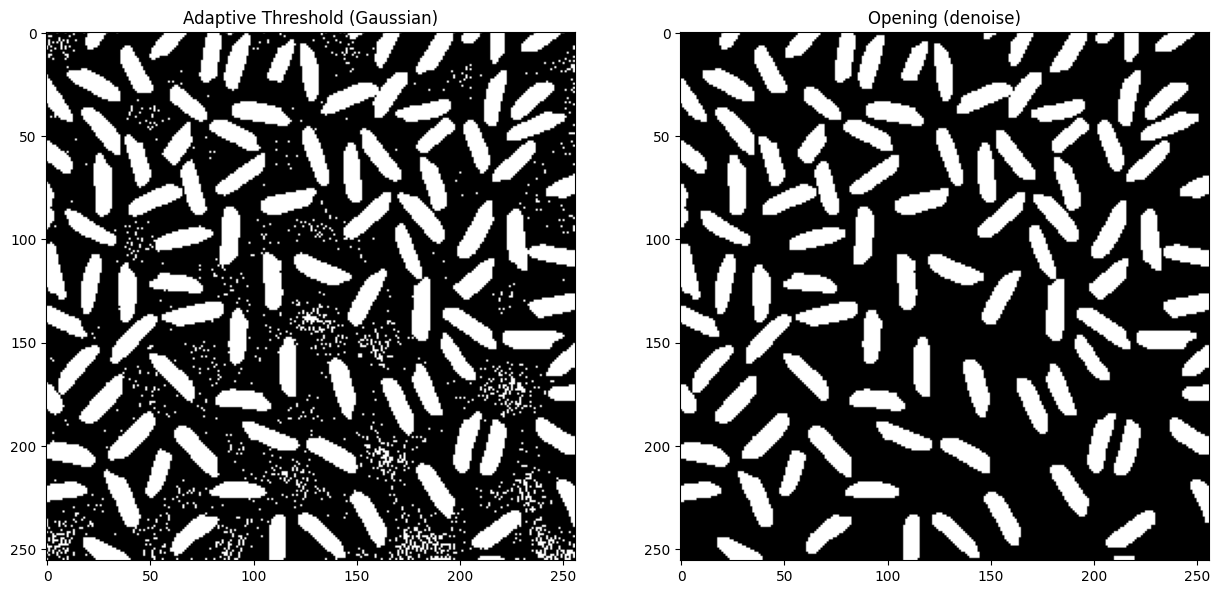

In [ ]:
# Read image
img = cv.imread("rice.png", cv.IMREAD_GRAYSCALE)

adaptive_gauss = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 51, 1)

kernel = np.ones((3,3), np.uint8)
opening = cv.morphologyEx(adaptive_gauss, cv.MORPH_OPEN, kernel)

plot_img([adaptive_gauss, opening],["Adaptive Threshold (Gaussian)", "Opening (denoise)"])


In [ ]:
bw = opening > 0

bw_clean = morphology.remove_small_objects(bw, min_size=50)

labels = measure.label(bw_clean)
num_rice = labels.max()

print("Số hạt gạo =", num_rice)


Số hạt gạo = 94


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

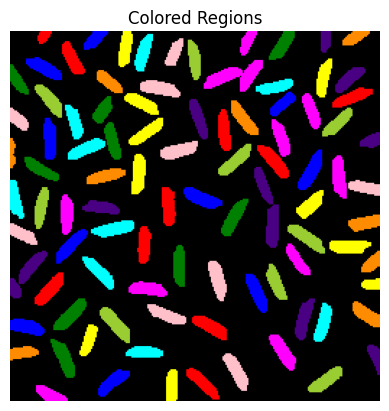

In [ ]:
colored = color.label2rgb(labels, bg_label=0)
plt.imshow(colored)
plt.title("Colored Regions")
plt.axis('off')


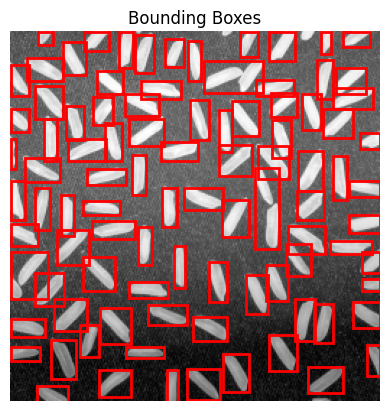

In [ ]:
props = measure.regionprops(labels)

plt.imshow(img, cmap='gray')
plt.title("Bounding Boxes")
plt.axis('off')

for p in props:
    y, x, h, w = p.bbox  # bbox format: (min_row, min_col, max_row, max_col)
    rect = plt.Rectangle((x, y), w - x, h - y, fill=False, edgecolor='red', linewidth=2)
    plt.gca().add_patch(rect)

plt.show()
